In [2]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.random import normal

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


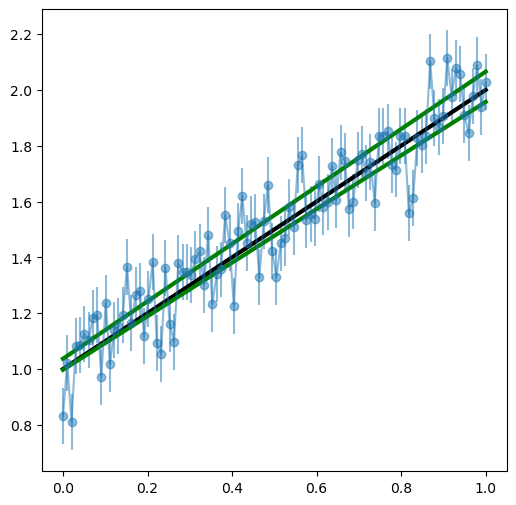

In [15]:
fig = plt.figure(figsize=(6, 6))
ax = fig.add_subplot(111)

num_points = 100
slope = 1.
intercept = 1.
sigma = 0.1

x = np.linspace(0, 1, num_points)
y = np.polyval([slope, intercept], x)
noisy_y = y + normal(scale=sigma, size=len(x))

coeffs, cov = np.polyfit(x, noisy_y, 1, w=1./sigma*np.ones_like(x), cov='unscaled')
unc = np.sqrt(np.diag(cov))

fit_line_plus = np.polyval(coeffs + unc, x)
fit_line_minus = np.polyval(coeffs - unc, x)

ax.errorbar(x, noisy_y, yerr=sigma*np.ones_like(x), marker='o', alpha=0.5)
ax.plot(x, y, lw=3, color='k')
ax.plot(x, fit_line_minus, lw=3, color='green')
ax.plot(x, fit_line_plus, lw=3, color='green')

fig.savefig("Example_Fitting_Line.jpg", dpi=300, bbox_inches="tight")